Starting data download for NQ=F from 2010-01-01...


[*********************100%***********************]  1 of 1 completed


Download successful.
Original data saved to NQ=F_daily_yf.csv
MetaTrader 5-compatible data saved to NQ=F_daily_mt5.csv


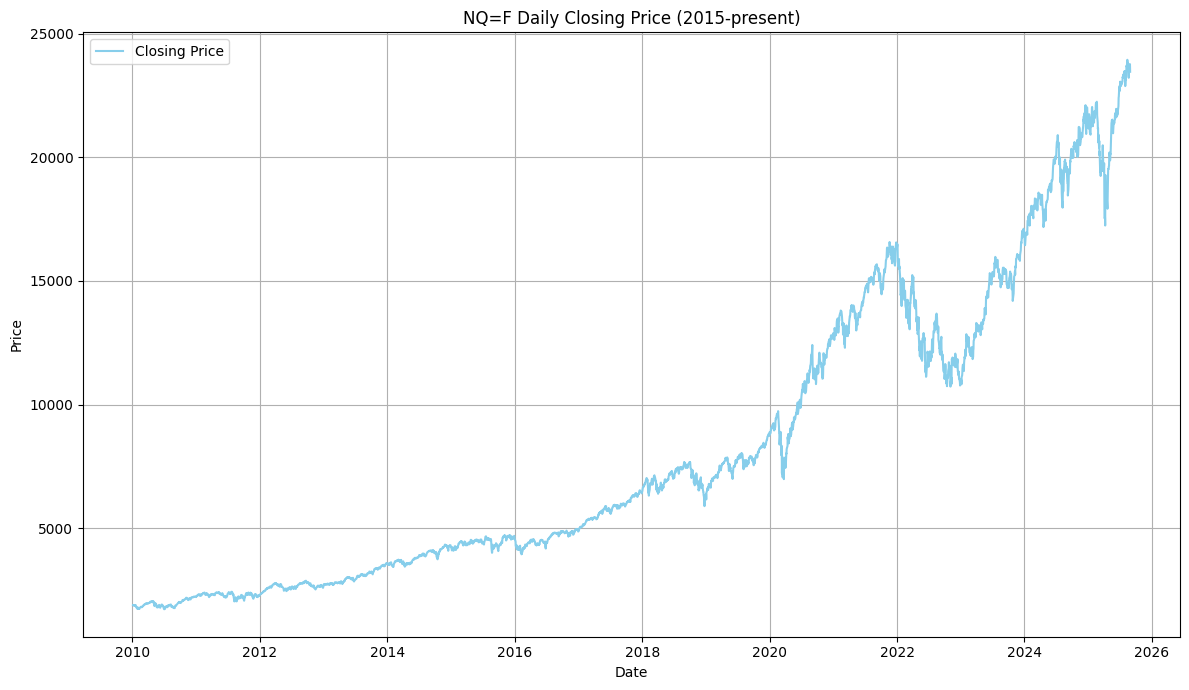

Closing price plot displayed.


In [1]:
#
# Forex Data Downloader and Converter Script
#
# This script downloads daily forex data from Yahoo Finance,
# saves it to two different CSV formats (one for general use and
# one specifically for MetaTrader 5), and plots the closing price.
#
# Requires the following libraries:
#   - yfinance
#   - pandas
#   - matplotlib
#
# To install them, run:
#   pip install yfinance pandas matplotlib
#

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def download_and_process_data(ticker_symbol: str, start_date: str = '2010-01-01'):
    """
    Downloads forex data, saves it to CSVs, and plots the closing price.

    Args:
        ticker_symbol (str): The ticker symbol for the forex pair (e.g., 'EURUSD=X').
        start_date (str): The start date for the data download in 'YYYY-MM-DD' format.
    """
    print(f"Starting data download for {ticker_symbol} from {start_date}...")

    try:
        # Download the daily data from Yahoo Finance
        # The 'Adj Close' is used for close price as it accounts for splits and dividends
        end_date = datetime.now().strftime('%Y-%m-%d')
        data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1d', auto_adjust='true')

        if data.empty:
            print(f"No data found for the ticker symbol {ticker_symbol}. Please check the symbol.")
            return

        print("Download successful.")

        # --- Part 1: Save the original data to a standard CSV file ---
        original_csv_filename = f"{ticker_symbol}_daily_yf.csv"
        data.to_csv(original_csv_filename)
        print(f"Original data saved to {original_csv_filename}")

        # --- Part 2: Convert and save the data for MetaTrader 5 (MT5) ---
        # The required MT5 format is: Date,Time,Open,High,Low,Close,Volume,Spread

        # Reset the index to make the 'Date' a column
        mt5_data = data.reset_index()

        # Format the 'Date' and create a 'Time' column for MT5
        mt5_data['Date'] = mt5_data['Date'].dt.strftime('%Y.%m.%d')
        mt5_data['Time'] = '00:00:00' # Daily data, so time is always midnight

        # Rename the columns to match MT5 requirements
        mt5_data = mt5_data.rename(columns={
            'Open': 'Open',
            'High': 'High',
            'Low': 'Low',
            'Close': 'Close', # Using 'Close' as it is what MetaTrader wants
            'Volume': 'Volume'
        })

        # Add a 'Spread' column, which is often not available and can be set to 0
        mt5_data['Spread'] = 0

        # Reorder columns to the specific MT5 format
        mt5_data = mt5_data[['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Spread']]

        mt5_csv_filename = f"{ticker_symbol}_daily_mt5.csv"
        mt5_data.to_csv(mt5_csv_filename, index=False)
        print(f"MetaTrader 5-compatible data saved to {mt5_csv_filename}")

        # --- Part 3: Plot the closing price data ---
        plt.figure(figsize=(12, 7))
        plt.plot(data.index, data['Close'], label='Closing Price', color='skyblue')
        plt.title(f"{ticker_symbol} Daily Closing Price (2015-present)")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
        print("Closing price plot displayed.")

    except Exception as e:
        print(f"An error occurred: {e}")

# --- User Configuration ---
# You can change the ticker symbol here to any forex pair available on Yahoo Finance.
# Common symbols include: 'EURUSD=X', 'GBPUSD=X', 'USDJPY=X'
USER_TICKER_SYMBOL = 'NQ=F'

if __name__ == "__main__":
    download_and_process_data(USER_TICKER_SYMBOL)
